In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from runner import *

plotpath = parent_directory + "\\plots\\"
plotting.set_dir(plotpath)

loading complete, calculating accuracy
getting human labeled boundaries
complete


In [3]:
cell_rna = RNA[RNA['process_index'] > 0].copy()

cell_rna['branch'] = cell_rna['process_index'].astype(str)
cell_rna['branch'] = cell_rna['branch'].str[0]
cell_rna['branch_name'] = cell_rna['cell_index'].astype(str) + "_" + cell_rna['branch']


blanks = cell_rna[cell_rna['barcode_id'] < 290]
minimum = np.array(blanks['barcode_id'].value_counts().reset_index(name='counts')['counts'])[int(np.floor(290*0.05))]
print(f'minimum {minimum}')

reals = cell_rna[cell_rna['barcode_id'] > 290]

real_counts = reals['barcode_id'].value_counts().rename_axis('barcode_id').reset_index(name='counts')
usable_ids = real_counts[real_counts['counts'] > minimum]
#
# usable_rna = reals[reals['barcode_id'].isin(usable_ids['barcode_id'])]
# usable_unlabeled_rna = RNA[RNA['barcode_id'].isin(usable_ids['barcode_id'])]
#
# value_counted = usable_rna.groupby(['branch_name', 'barcode_id']).size().unstack(fill_value=0)
# averaged = value_counted.divide(np.array(value_counted.sum(axis=1)), axis='rows')

minimum 11


In [4]:
rna_p = RNA.copy()
rna_p['y'] = (np.floor(rna_p['global_y'])).astype(int)
rna_p['x'] = (np.floor(rna_p['global_x'])).astype(int)
rna_p['process'] = processImage[rna_p['y'], rna_p['x']]

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

rna_p_highv = rna_p[rna_p['barcode_id'].isin(usable_ids['barcode_id'])]
value_counted = rna_p_highv.groupby(['process', 'barcode_id']).size().unstack(fill_value=0)
averaged = value_counted.divide(np.array(value_counted.sum(axis=1)), axis='rows')

pca = PCA(n_components=20)
embeddings = pca.fit_transform(averaged)

tsne = TSNE(n_components=3, n_iter=10000)
tsne_embeddings = tsne.fit_transform(embeddings)

process_cols = pd.DataFrame({'process' : averaged.index,
                             'x_embed' : tsne_embeddings[:, 0],
                             'y_embed' : tsne_embeddings[:, 1],
                             'z_embed' : tsne_embeddings[:, 2]}
)
x = process_cols['x_embed']
process_cols['x_embed'] = (x - x.min())/(x.max() - x.min())
y = process_cols['y_embed']
process_cols['y_embed'] = (y - y.min())/(y.max() - y.min())
z = process_cols['z_embed']
process_cols['z_embed'] = (z - z.min())/(z.max() - z.min())
process_cols['c'] = list(map(tuple, np.vstack([process_cols['x_embed'], process_cols['y_embed'], process_cols['z_embed']]).T))



C:\Users\Harrison\anaconda3\envs\Segmentation\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Harrison\anaconda3\envs\Segmentation\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


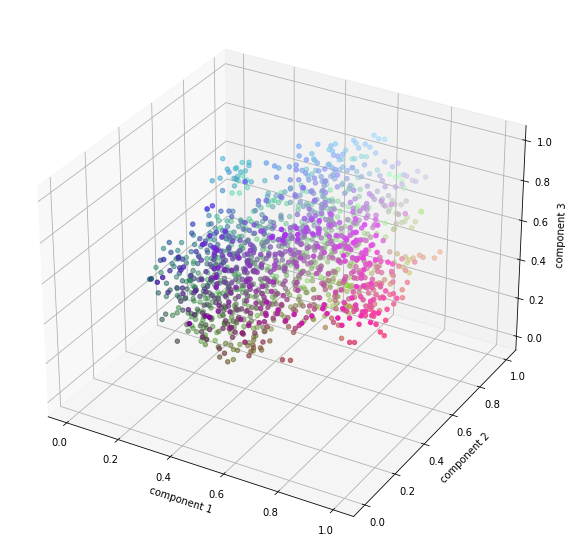

In [28]:
fig = plt.figure(figsize=(10,10))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.scatter(process_cols['x_embed'], process_cols['y_embed'], process_cols['z_embed'], c = process_cols['c'])
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.savefig(plotpath + "tsne_embedding_colors.png")
plt.show()

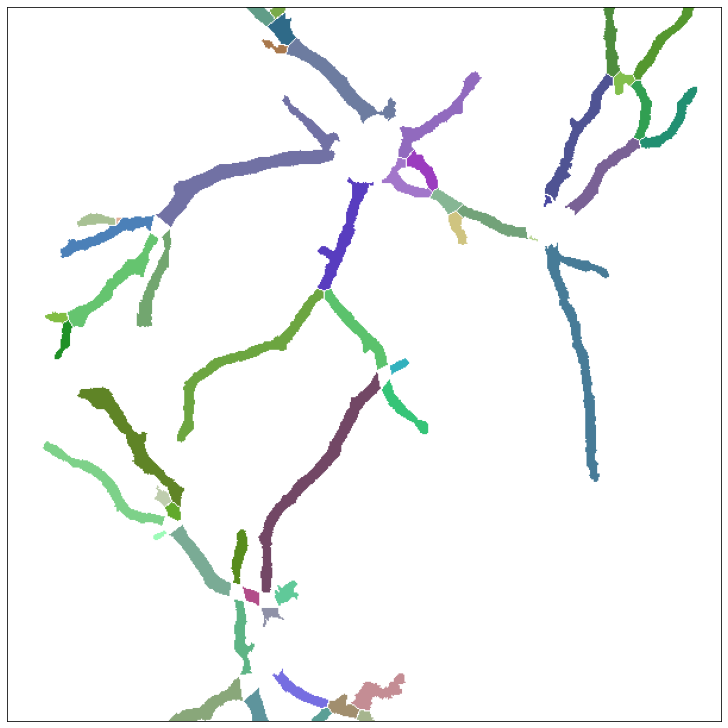

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [27]:
im = plotting.panel(processImage, bbox, 1)

embedded = np.ones((im.shape[0], im.shape[1], 3))
for iter, row in process_cols.iterrows():
    if iter == 0:
        continue
    embedded[im==row['process']] = row['c']

plotting.implot(embedded, name="embedimg_pca")

# fig, ax = plt.subplots(figsize=(12,12), constrained_layout=True)
# ax.margins(0.01)
# fig.tight_layout()
# axes = False
# ax.tick_params(left=axes,
#                     bottom=axes,
#                     labelbottom=axes,
#                     labelleft=axes)
# plotting.axplot(embedded, ax)
# fig.savefig(plotpath + "embedimg_pca.png")

In [18]:
print(RNA['cell_index'].value_counts().quantile(0.25))
print(RNA['cell_index'].value_counts().quantile(0.75))

7163.5
14082.75
